<h1>Homework 02</h1>

In [1]:
# Import libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
# Load the penguins dataset
df = sns.load_dataset("penguins")
# print(df.head())
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])

df_filtered['class_encoded'] = y_encoded
# print(df_filtered.head())

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded']  # Target variable
X = df_filtered.drop(['species', 'island', 'sex','class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


What is the purpose of "y_encoded = le.fit_transform(df_filtered['species'])" ?
- To encode the categorical target variable ('species' column in the "df_filtered" dataframe) into numerical values.

What is the purpose of "X = df.drop(['species', 'island', 'sex'], axis=1)" ?
- To remove certain columns ('species', 'island', 'sex') from the dataframe "df" and create a feature matrix 'X'.

Why we cannot use "island" and "sex" features?
- Because they are categorical features and we need to encode them into numerical values.

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')

logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(logreg.coef_, logreg.intercept_)

Accuracy: 0.5813953488372093
[[ 2.76031248e-03 -8.38966923e-05  4.61499704e-04 -2.86532980e-04]] [-8.53929629e-06]


c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


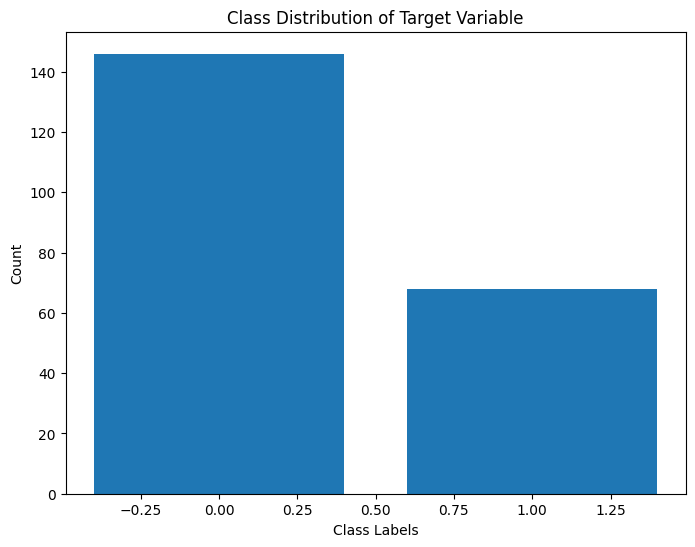

In [14]:
import matplotlib.pyplot as plt

class_labels = sorted(y.unique())  # Get unique class labels

# Count the occurrences of each class
class_counts = y.value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution of Target Variable')
plt.show()

 Why is accuracy low? why does the saga solver perform poorly?
 - Because the dataset is imbalanced. One class significantly outnumbers the other in the target variable, the model may have a bias towards the majority class.
 - The 'saga' solver is known for handling large datasets. It is not suitable for small datasets.

In [13]:
# Change the solver to "liblinear"
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 1.5997544  -1.43222015 -0.15123497 -0.00401141]] [-0.07601213]


Why is accuracy now? why does the "liblinear" solver perform better than "saga" solver ?
- The 'liblinear' solver is a good choice for small to medium-sized datasets.
- It's a reliable solver for binary and multiclass classification problems which have a moderate amount of data.

In [17]:
# Repeat the above tasks after feature normalization and observe the accuracy levels.
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(solver='saga')
logreg.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred_1 = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("Accuracy with saga solver:", accuracy_1)

print(logreg.coef_, logreg.intercept_)

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred_2 = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy with liblinear solver:", accuracy_2)

print(logreg.coef_, logreg.intercept_)


Accuracy with saga solver: 0.9767441860465116
[[ 3.90444435 -0.8235542   0.18542445 -0.73554556]] [-1.96733388]
Accuracy with liblinear solver: 0.9767441860465116
[[ 3.77819685 -0.75341497  0.17248526 -0.71597049]] [-1.72205563]


Now observe the accuracies for both  "liblinear" solver and "saga" solver. Why accuracy of the "saga" solver is increased?
- Standardizing (scaling) the features using 'StandardScaler' can help the saga solver converge more effectively and improve the model's performance.
- Features with different scales can cause numerical instability, leading to slower convergence or suboptimal solutions. Feature scaling provides enhanced numerical stability and convergence properties.

In [18]:
# Run the following code to load the dataset again, and use logistic regression for the classification.

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
# Load the penguins dataset
df = sns.load_dataset("penguins")

df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded


print(df_filtered.head())

X = df_filtered.drop(['species', 'class_encoded'], axis=1)  # Choose features
y = df_filtered['class_encoded']  # Target variable

X.head()

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  class_encoded  
0       3750.0    Male              0  
1       3800.0  Female              0  
2       3250.0  Female              0  
4       3450.0  Female              0  
5       3650.0    Male              0  


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(solver='saga')
# logreg = LogisticRegression(max_iter=166, solver='newton-cg')
# logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, multi_class='ovr', random_state=42)

logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(logreg.coef_, logreg.intercept_)

ValueError: could not convert string to float: 'Dream'

What is the problem? Why algorithm cannot perform classification?
- The error message "ValueError: could not convert string to float: 'Dream'" suggests that the logistic regression model encountered an issue because it cannot directly work with categorical or string data. In dataset, it seems there might be a categorical or non-numeric feature (possibly 'island' and 'sex') that the algorithm cannot use for classification without appropriate preprocessing.

How to solve this issue?
- Need to encode the categorical features into numerical values using 'LabelEncoder' or 'OneHotEncoder' from the 'sklearn.preprocessing' module.

In [26]:
# Use the following code, to replace string features with numerical ones.
df_filtered = pd.get_dummies(df_filtered, columns=['island', 'sex'], drop_first=True)
df_filtered.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,class_encoded,island_Dream,island_Torgersen,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,False,True,True
1,Adelie,39.5,17.4,186.0,3800.0,0,False,True,False
2,Adelie,40.3,18.0,195.0,3250.0,0,False,True,False
4,Adelie,36.7,19.3,193.0,3450.0,0,False,True,False
5,Adelie,39.3,20.6,190.0,3650.0,0,False,True,True


In [28]:
# Use the following code to visualize the encoding
samples = df_filtered.groupby('sex_Male').head(1)
print(samples)
samples = df_filtered.groupby('island_Torgersen').head(1)
print(samples)
samples = df_filtered.groupby('island_Dream').head(1)
print(samples)

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie            39.1           18.7              181.0       3750.0   
1  Adelie            39.5           17.4              186.0       3800.0   

   class_encoded  island_Dream  island_Torgersen  sex_Male  
0              0         False              True      True  
1              0         False              True     False  
   species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0   Adelie            39.1           18.7              181.0       3750.0   
20  Adelie            37.8           18.3              174.0       3400.0   

    class_encoded  island_Dream  island_Torgersen  sex_Male  
0               0         False              True      True  
20              0         False             False     False  
   species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0   Adelie            39.1           18.7              181.0       3750.0   
30  Adelie      

In [29]:
# Use the following code to apply logistic regression
X = df_filtered.drop(['species','class_encoded'], axis=1)

y = df_filtered['class_encoded']  # Target variable
print(X.shape, y.shape)
X.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(solver='saga',max_iter=150,)

#logreg = LogisticRegression(max_iter=166, solver='newton-cg')
# logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, multi_class='ovr', random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(logreg.coef_, logreg.intercept_)

(214, 7) (214,)
Accuracy: 1.0
[[ 3.63408911  0.16296484  0.62612347  0.10206609  2.59920768 -0.87721649
  -0.35906787]] [-5.99579725]


Why we are using the "MaxAbsScaler" scaler rather than the "StandardScaler"?
- Because the 'MaxAbsScaler' is suitable for data that is already centered at zero or sparse data. It is meant for data that is already centered at zero or sparse data. It does not shift/center the data, and thus does not destroy any sparsity.
- MaxAbsScaler is chosen over StandardScaler for binary features like "island_Dream," "island_Torgersen," and "sex_Male" to maintain their binary nature and only scale them within the [0, 1] range.

In [32]:
# Use the following code to visualize feature scaling before and after normalization.
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)

[[0.59655172 0.98139535 0.93396226 0.91666667 0.         1.
  1.        ]
 [0.8862069  0.88372093 0.94811321 0.82291667 1.         0.
  1.        ]
 [0.68275862 0.8        0.9245283  0.73958333 0.         1.
  0.        ]
 [0.87586207 0.86046512 0.94811321 0.92708333 1.         0.
  1.        ]
 [0.7137931  0.86046512 0.95283019 0.80729167 0.         1.
  1.        ]
 [0.64310345 0.95348837 0.93867925 0.78645833 0.         1.
  1.        ]
 [0.65172414 0.85116279 0.82075472 0.70833333 0.         0.
  0.        ]
 [0.5862069  0.79534884 0.87264151 0.70833333 1.         0.
  0.        ]
 [0.73965517 0.81860465 0.9245283  0.97916667 0.         1.
  1.        ]
 [0.62068966 0.79534884 0.88207547 0.77083333 1.         0.
  0.        ]
 [0.82068966 0.85116279 0.91981132 0.80208333 1.         0.
  0.        ]
 [0.80517241 0.83255814 0.91981132 0.6875     1.         0.
  0.        ]
 [0.63103448 0.85581395 0.86792453 0.72395833 1.         0.
  0.        ]
 [0.72586207 0.88837209 0.91981132 0.8

What can you observe in the values related to "island_Dream",    "island_Torgersen"  and   "sex_Male" features before and after scaling?
- For binary features like "island_Dream," "island_Torgersen," and "sex_Male," MaxAbsScaler will scale the values to be within the range [0, 1] since they are already binary (0 or 1). After scaling, these binary features will retain their 0 or 1 values because the maximum absolute value for these features is 1. So, there may not be a noticeable difference in these features before and after scaling when using MaxAbsScaler.
- StandardScaler to binary features like "island_Dream," "island_Torgersen," and "sex_Male," they may become centered around 0, which means they could have values around -0.5 and 0.5 instead of 0 and 1. This transformation might not be suitable for binary features because it can disrupt their original interpretation.